In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# 과제 1
## Mandatory part

### Netflix 에 한국작품은 얼마나 있나?
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [3]:
count_korea_show = df[df['country'] == 'South Korea'].shape[0]
count_korea_show

183

### 총 183개의 작품이 Netflix 한국에 존재한다.

### Bonus part
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [4]:
# 'show_id' 에 isnull 데이터가 있는 지 확인해주어서 후에 group_by를 했을때, show_id를 세주었다.
df['show_id'].isnull().sum()

0

In [5]:
# df['country']를 ','기준으로 split 해주었고, sort_values 를 통해 각 나라별로 얼마나 많은 작품이 있는지 보았다.
sol_country = df[df['country'].map(lambda x: len(str(x).split(','))==1)]
print(sol_country.groupby('country')['show_id'].count().sort_values(ascending=False))
print(sol_country['country'].unique())

country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
                  ... 
Croatia              1
Cyprus               1
Namibia              1
Finland              1
Zimbabwe             1
Name: show_id, Length: 69, dtype: int64
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Thailand' 'Nigeria' nan 'United Kingdom' 'Japan' 'South Korea' 'Italy'
 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland' 'France' 'Argentina'
 'Germany' 'Poland' 'Kenya' 'Pakistan' 'Australia' 'Taiwan' 'Denmark'
 'Hong Kong' 'China' 'Philippines' 'Netherlands' 'United Arab Emirates'
 'Lebanon' 'Colombia' 'Uruguay' 'South Africa' 'Malaysia' 'Finland'
 'Norway' 'Peru' 'Chile' 'Ghana' 'Saudi Arabia' 'Namibia' 'Russia'
 'New Zealand' 'Vietnam' 'Sweden' 'Kuwait' 'Ireland' 'Zimbabwe' 'Hungary'
 'Bulgaria' 'Venezuela' 'Israel' 'West Germany' 'Belgium' 'Cambodia'
 'Jordan' 'Austria' 'Bangladesh' 'Senegal' 'Guatemala' 'Ukraine

### 순서대로 미국 2555 작품, India 923 작품등등이 존재하였다.

## 과제 2
### __Mandatory Part__
다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [6]:
bit = pd.read_csv("./BitCoin.csv")
bit=bit.sort_values('Date',ascending = True)
print(bit.shape) # (1609, 8) 의 shape 을 가졌다.
bit.head()

(1609, 8)


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000
1574,1574,2013-01-06,128.81,129.78,127.20,129.30,7521959.816,1445800000
1544,1544,2013-01-07,97.51,97.66,86.30,88.05,5759985.732,1107130000
1513,1513,2013-01-08,106.21,108.00,103.01,104.00,6348194.873,1220190000
1482,1482,2013-01-09,135.14,145.81,134.81,138.34,8179728.096,1572230000


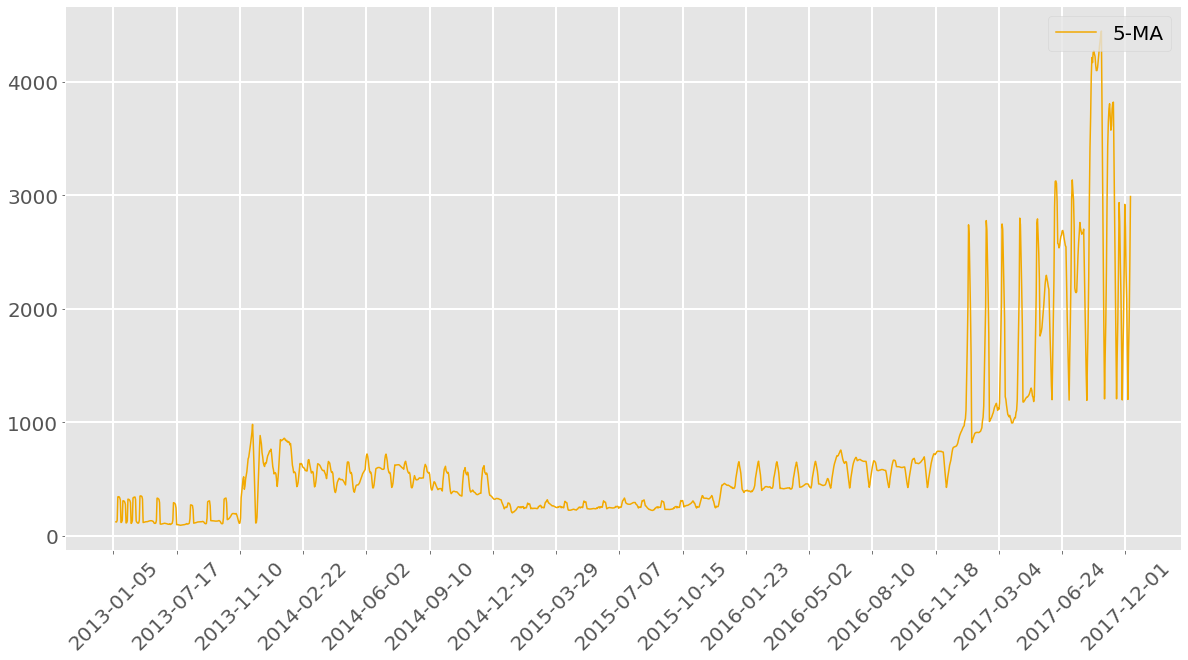

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.grid(linestyle = '-',linewidth = 2)
plt.plot(bit['Date'],bit['Open'].rolling(window=5).mean() , color = '#f2a900', label = '5-MA')
plt.xticks(np.arange(0, 1609, step=100),fontsize=20,rotation=45)
plt.yticks(fontsize =20)
plt.legend( loc = 'upper right',prop={'size': 20})
plt.show()

### Bonus Part
- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [8]:
## eth = pd.read_csv('./ETH_day.csv')
eth = eth.sort_values('Date',ascending =True,ignore_index=True)
eth.shape

NameError: name 'eth' is not defined

In [ ]:
bit_2 = bit[('2016-06-01'<bit['Date']) & (bit['Date']<'2017-07-01')]
eth_2 = eth[(eth['Date']>'2016-06-01') &(eth['Date']<'2017-07-01') ]

In [ ]:
bit_2.rename(columns={'Open':'bit_open'}, inplace = True)
eth_2.rename(columns={'Open':'eth_open'}, inplace = True)
eth_2

In [ ]:
bit_2 = bit_2[['Date','bit_open']]
eth_2 = eth_2[['Date','eth_open']]
bit_2

In [ ]:
total = bit_2.merge(eth_2,how = 'left',on = 'Date')
total

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.grid(linestyle = '-',linewidth = 2)
plt.plot(total['Date'],total['bit_open'].rolling(window=5).mean() , color = '#f2a900', label = '5-MA_BTC')
plt.plot(total['Date'],total['eth_open'].rolling(window=5).mean() , color = '#3c3c3d', label = '5-MA_ETH')
plt.xticks(np.arange(0, 350, step=30),fontsize=20,rotation=45)
plt.yticks(fontsize =20)
plt.legend( loc = 'upper right',prop={'size': 10})
plt.show()